# Sep gaban-th, 2021

**Motivation**: This has the most succesfull registration of Nissl to Yale N162 0.1 mm <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import Allen
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
%%time
mice = Mice(Config(256, resolution=25), load_allen=True, load_parcel=True, load_preproc=True)

CPU times: user 7.2 s, sys: 4.8 s, total: 12 s
Wall time: 20.6 s


In [3]:
from register.register import *
reg = Register(mice)

In [4]:
kwargs = {
    'types': ['SyN', 'SyNAggro'],
    'grads': [0.25, 0.3],
    'syn_bins': [32],
    'aff_bins': [13],
    'aff_rates': [0.2, 0.8],
    'mi_q': 0.5,
    'n_seeds': 5,
}
kwargs

{
    'types': ['SyN', 'SyNAggro'],
    'grads': [0.25, 0.3],
    'syn_bins': [32],
    'aff_bins': [13],
    'aff_rates': [0.2, 0.8],
    'mi_q': 0.5,
    'n_seeds': 5
}

 bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


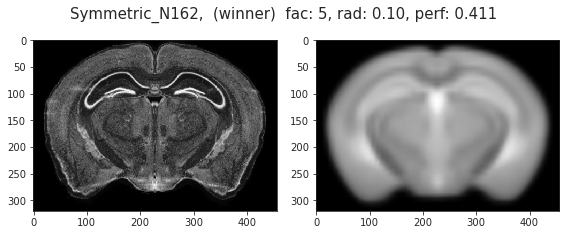

  0%|          | 0/5 [00:00<?, ?it/s]

Symmetric_N162, perf:
seed               0
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.987587

registering anat:  sub-SLC01_ses-1:   0%|                                     | 0/30 [00:00<?, ?it/s] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


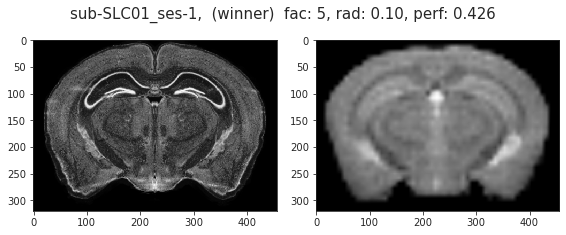

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC01_ses-1, perf:
seed               2
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.981961

registering anat:  sub-SLC01_ses-2:   3%|▋                   | 1/30 [5:16:03<152:45:39, 18963.44s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


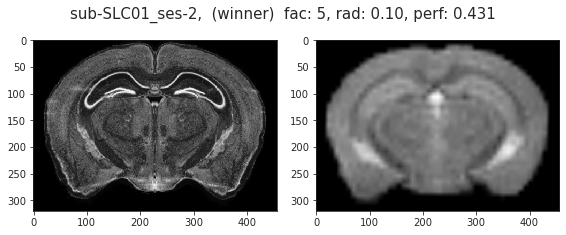

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC01_ses-2, perf:
seed               3
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.974484

registering anat:  sub-SLC01_ses-3:   7%|█▎                 | 2/30 [10:28:37<146:32:13, 18840.47s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


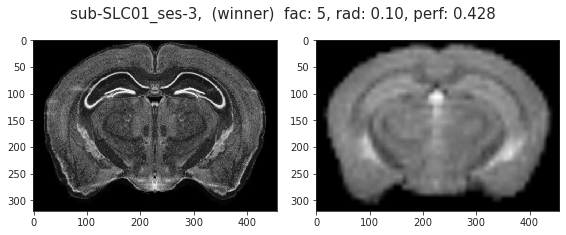

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC01_ses-3, perf:
seed               0
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.962286

registering anat:  sub-SLC02_ses-1:  10%|█▉                 | 3/30 [15:41:04<140:58:55, 18797.62s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


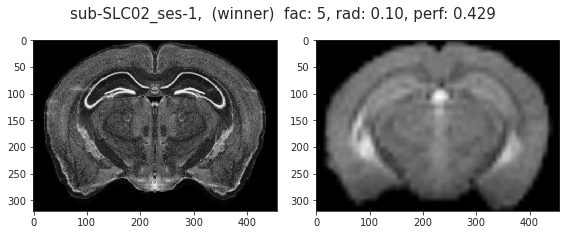

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC02_ses-1, perf:
seed               1
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.936319

registering anat:  sub-SLC02_ses-2:  13%|██▌                | 4/30 [20:55:16<135:54:54, 18819.03s/it]

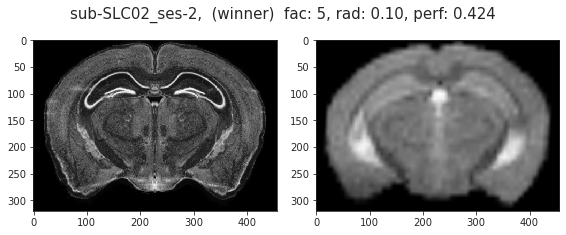

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC02_ses-2, perf:
seed               4
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.936449

registering anat:  sub-SLC02_ses-3:  17%|███▏               | 5/30 [26:19:59<132:21:07, 19058.70s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


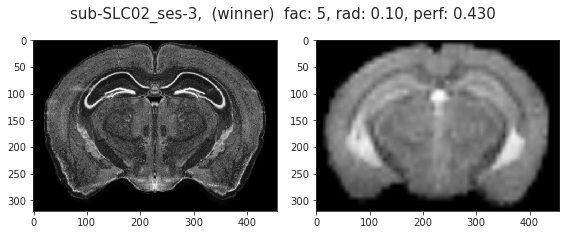

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC02_ses-3, perf:
seed               1
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.946395

registering anat:  sub-SLC03_ses-1:  20%|███▊               | 6/30 [31:49:44<128:42:11, 19305.49s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


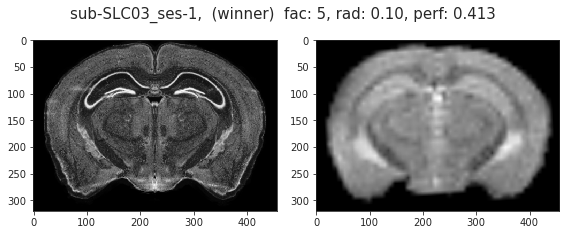

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC03_ses-1, perf:
seed               0
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.956925

registering anat:  sub-SLC03_ses-2:  23%|████▍              | 7/30 [37:06:20<122:41:35, 19204.15s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


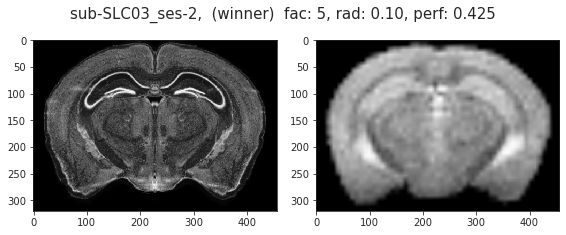

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC03_ses-2, perf:
seed               0
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.946528

registering anat:  sub-SLC03_ses-3:  27%|█████              | 8/30 [42:14:41<115:59:29, 18980.44s/it]

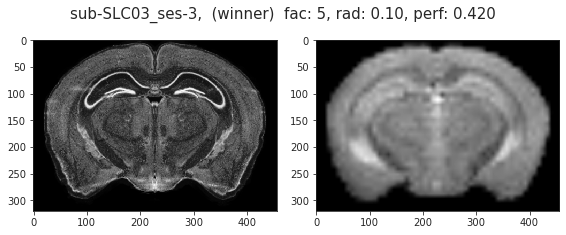

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC03_ses-3, perf:
seed               1
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.960585

registering anat:  sub-SLC04_ses-1:  30%|█████▋             | 9/30 [47:23:10<109:51:37, 18833.19s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


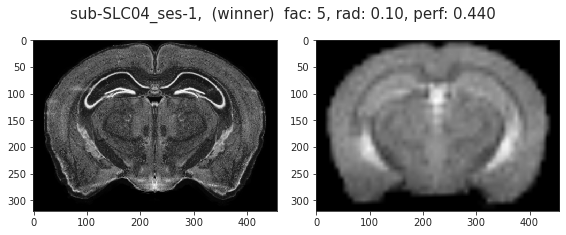

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC04_ses-1, perf:
seed               1
type             SyN
grad            0.25
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.982141

registering anat:  sub-SLC04_ses-2:  33%|██████            | 10/30 [52:37:26<104:40:04, 18840.22s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


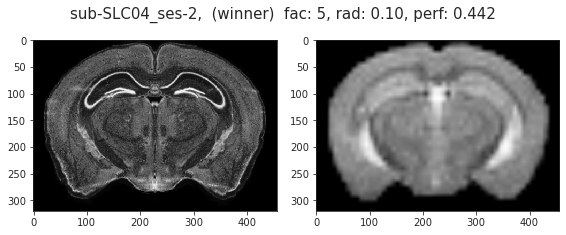

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC04_ses-2, perf:
seed               4
type             SyN
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.2
metric           sym
score       0.979793

registering anat:  sub-SLC04_ses-3:  37%|██████▉            | 11/30 [57:49:50<99:16:43, 18810.70s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


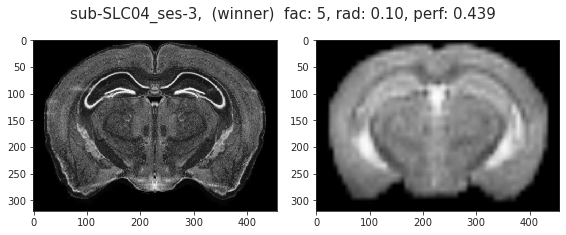

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC04_ses-3, perf:
seed              1
type            SyN
grad            0.3
syn_bin          32
aff_bin          13
aff_rate        0.8
metric          sym
score       0.98143

registering anat:  sub-SLC05_ses-1:  40%|███████▌           | 12/30 [63:09:33<94:37:10, 18923.89s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


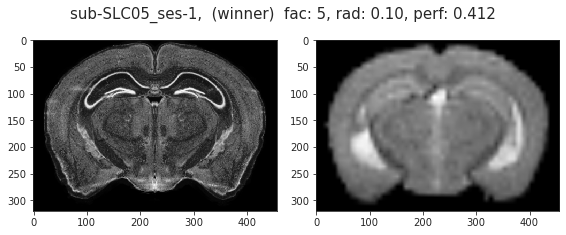

  0%|          | 0/5 [00:00<?, ?it/s]

sub-SLC05_ses-1, perf:
seed               1
type        SyNAggro
grad             0.3
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.976346

registering anat:  sub-SLC05_ses-2:  43%|████████▏          | 13/30 [68:25:07<89:22:39, 18927.03s/it] bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


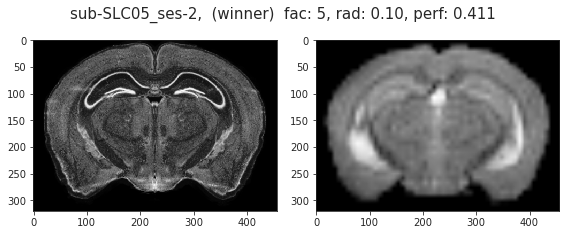

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
%%time
reg.register_anat(save_results=True, **kwargs)

 bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


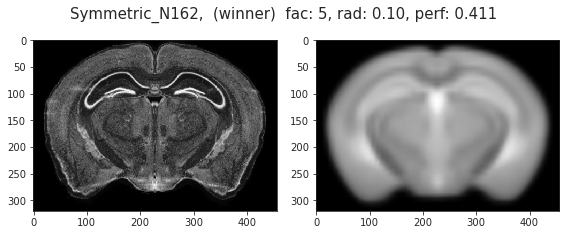

  0%|          | 0/3 [00:00<?, ?it/s]

Symmetric_N162, perf:
seed               0
type             SyN
grad            0.25
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.989239

registering anat:  sub-SLC01_ses-1:   0%|                                     | 0/30 [00:00<?, ?it/s] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


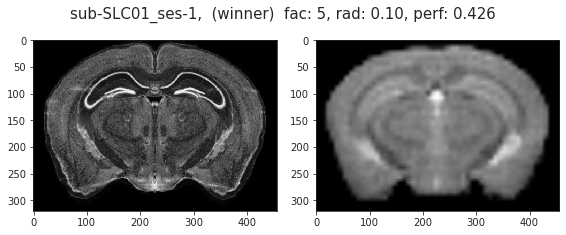

  0%|          | 0/3 [00:00<?, ?it/s]

sub-SLC01_ses-1, perf:
seed               1
type             SyN
grad            0.25
syn_bin           32
aff_bin           13
aff_rate         0.8
metric           sym
score       0.976612

registering anat:  sub-SLC01_ses-2:   3%|▋                     | 1/30 [2:21:01<68:09:43, 8461.52s/it] bad det -1 v -1 u 1
 bad det -1 v -1 u 1 new 1


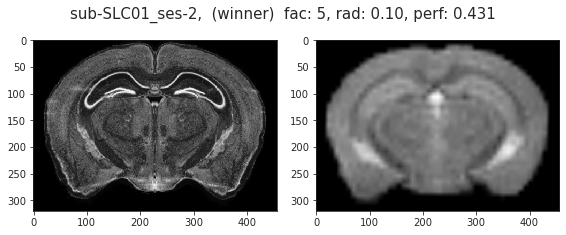

  0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
## Oct 03 :  This was 3 seeds, compare to 5 above ^

## Test

In [6]:
base_mi = ants.image_mutual_information(reg.nissl, reg.nissl)

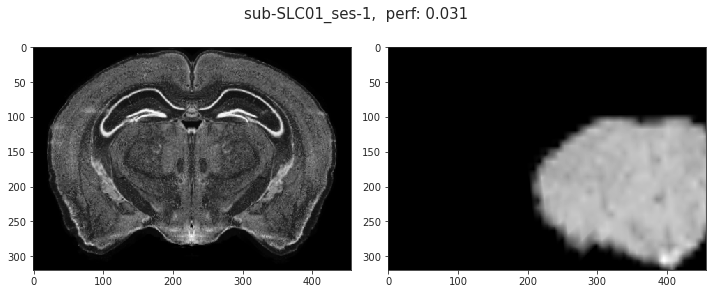

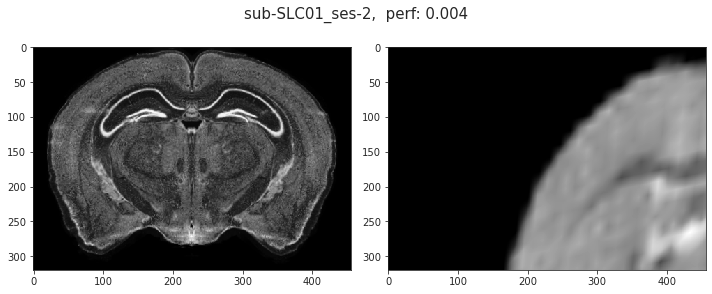

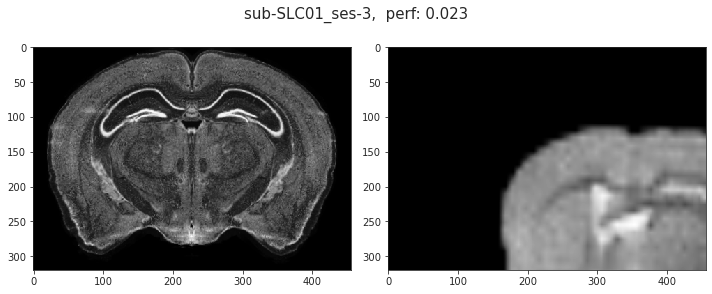

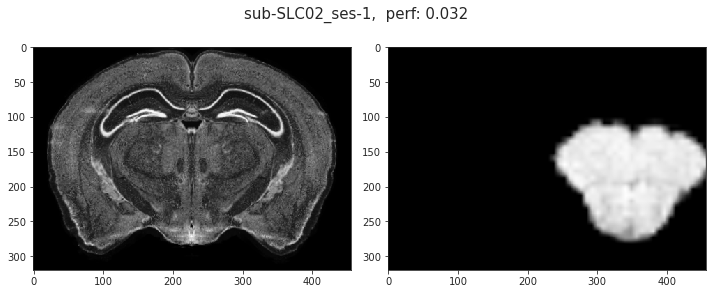

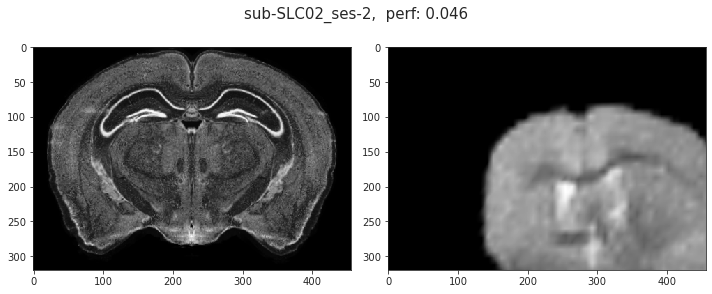

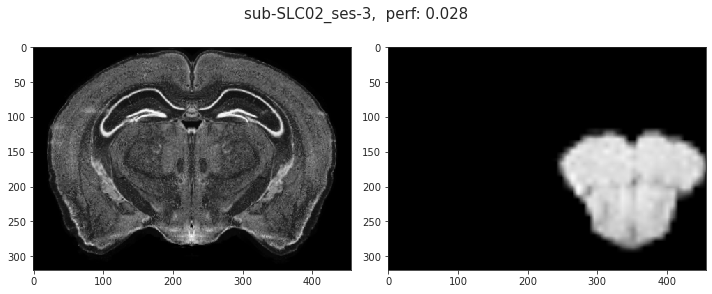

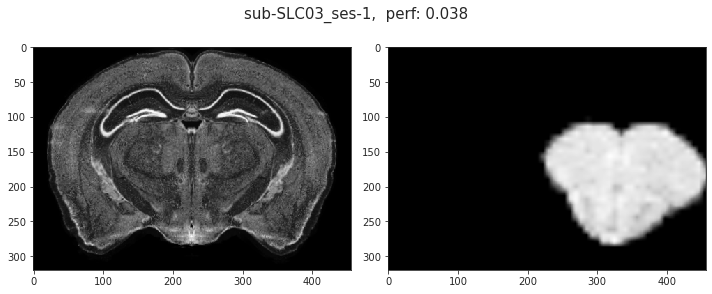

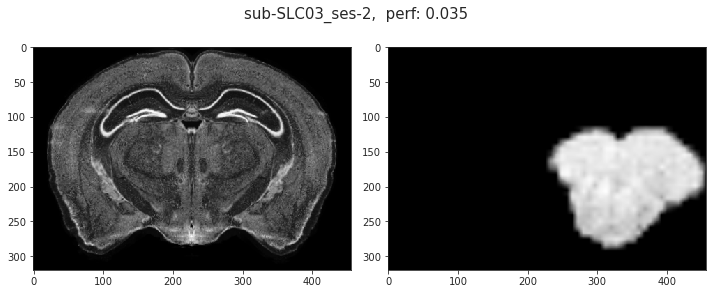

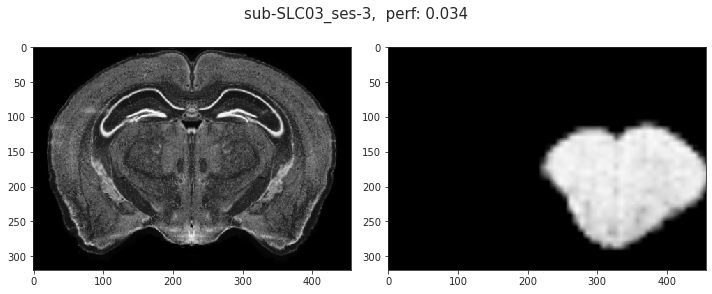

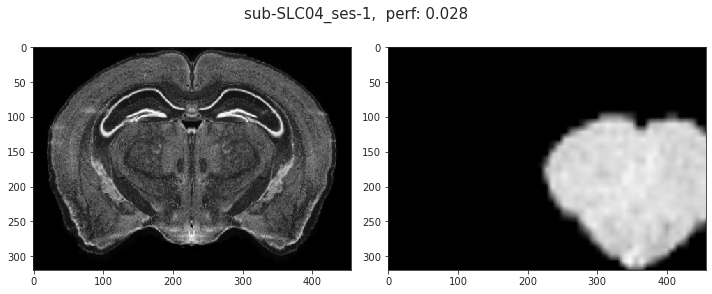

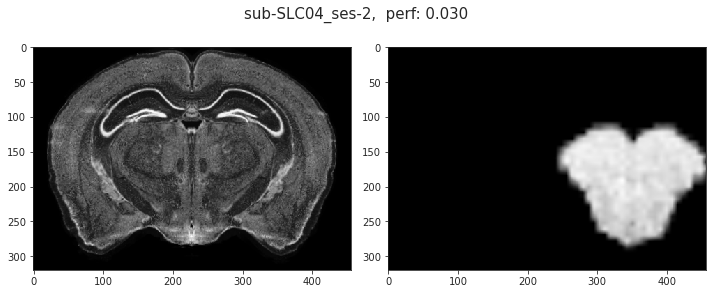

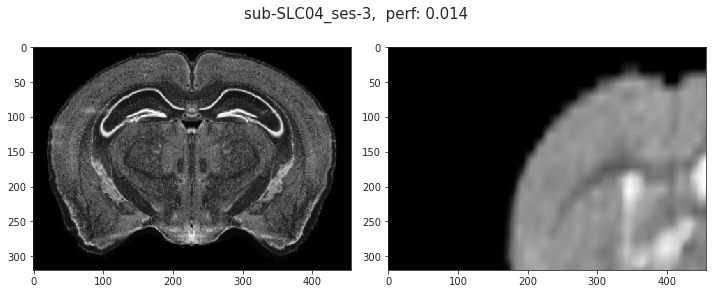

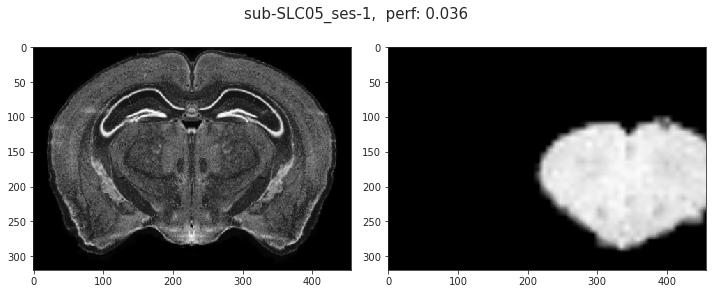

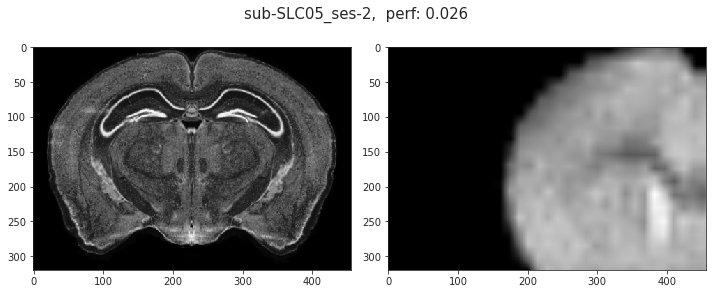

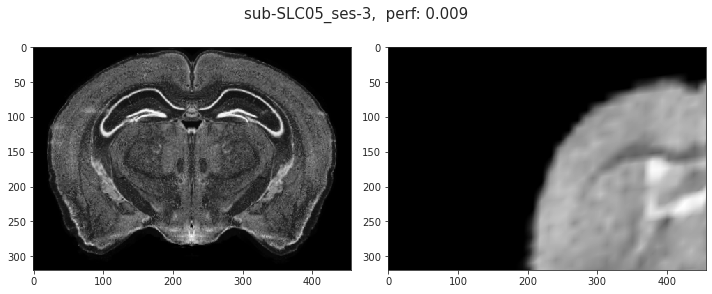

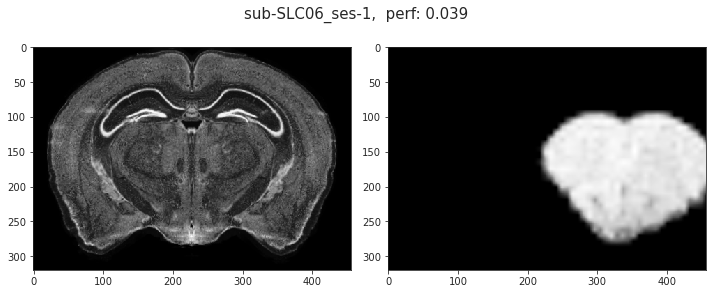

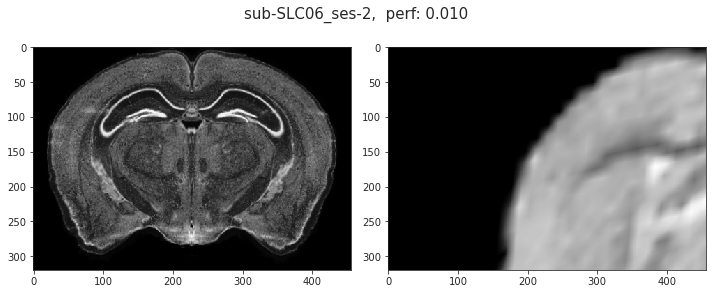

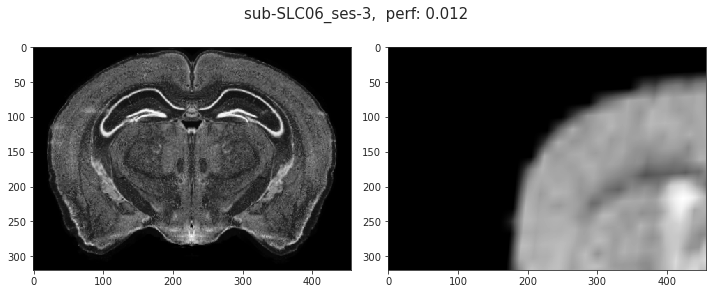

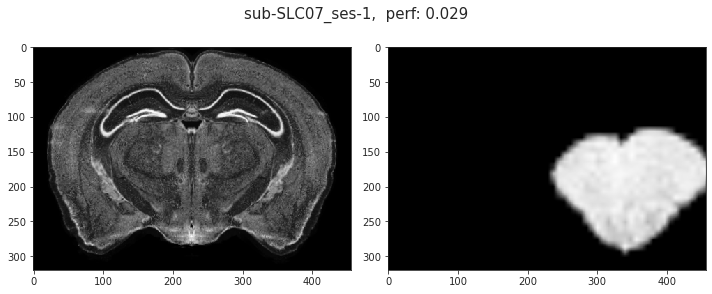

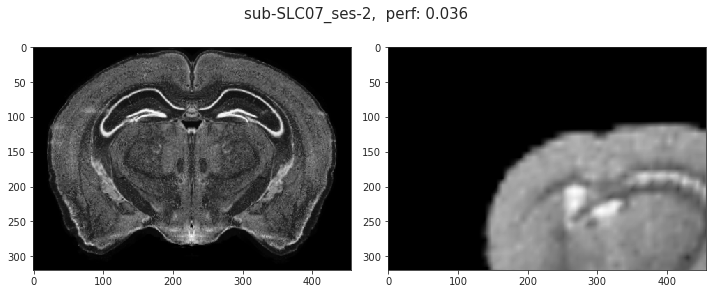

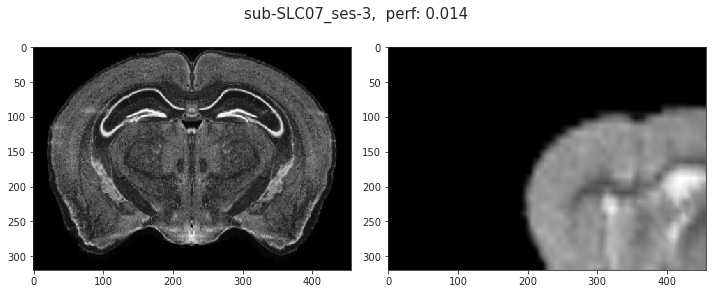

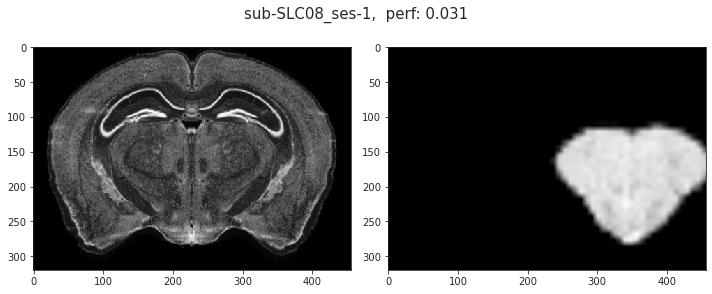

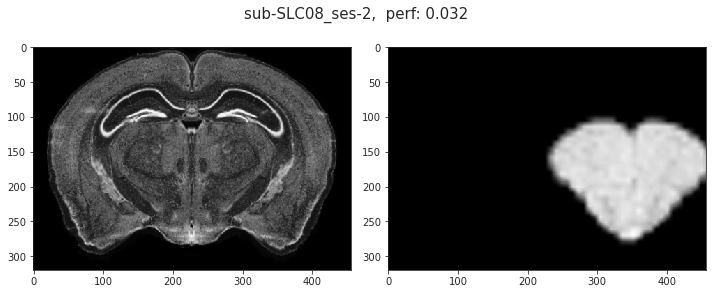

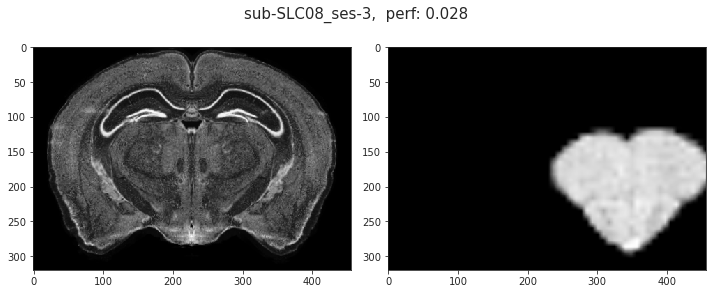

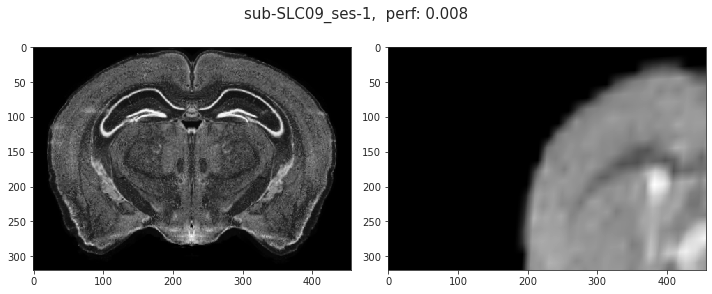

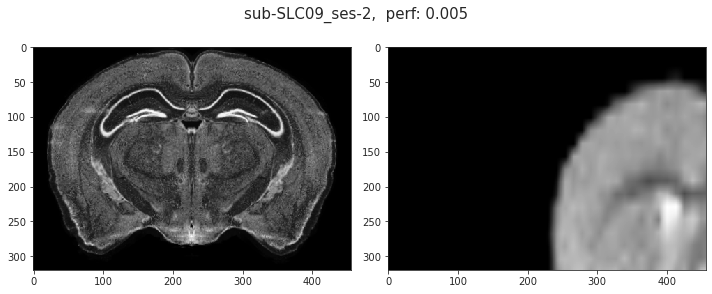

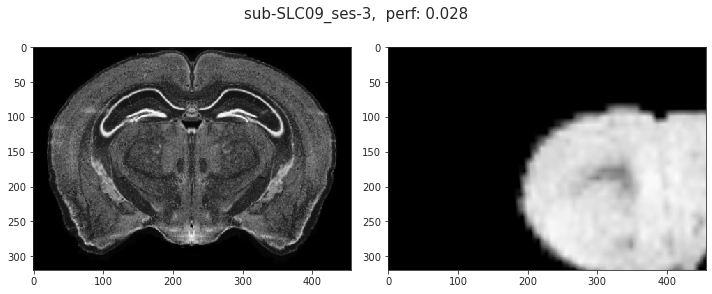

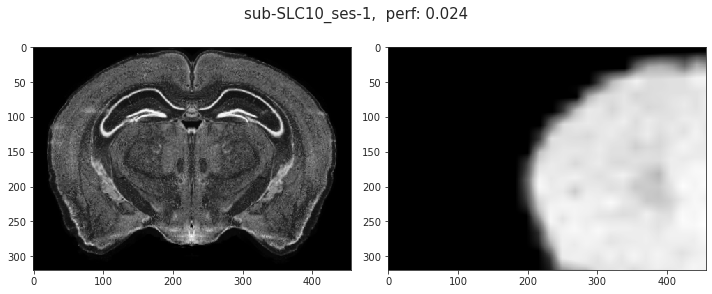

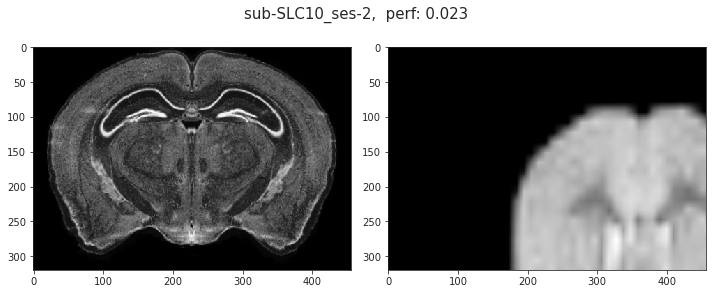

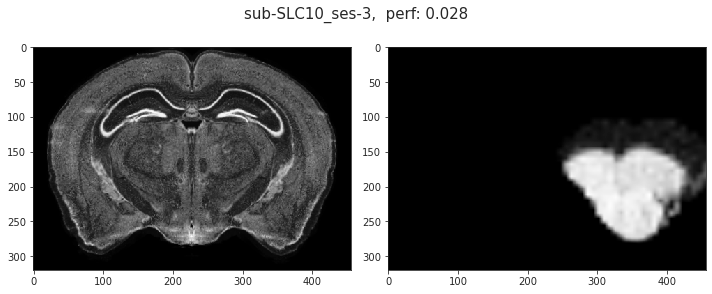

In [7]:
for key, anat in mice.T1w.items():
    indiv = reg._prepare(anat.get_data(), 200)
    tx_aff = f"{key}_space-CCF-3d_ants-Aff-init.mat"
    tx_aff = pjoin(mice.cfg.tx_dir, tx_aff)
    tx_aff = ants.read_transform(tx_aff)
    indiv_aff = tx_aff.apply_to_image(indiv, reg.nissl, 'linear')
    
    fig, axes = create_figure(1, 2, (10, 4))

    axes[0].imshow(reg.nissl[300], cmap='Greys_r')
    axes[1].imshow(indiv_aff[300], cmap='Greys_r')

    mi = ants.image_mutual_information(reg.nissl, indiv_aff)
    fig.suptitle(f"{key},  perf: {mi / base_mi:0.3f}", fontsize=15)
    plt.show()

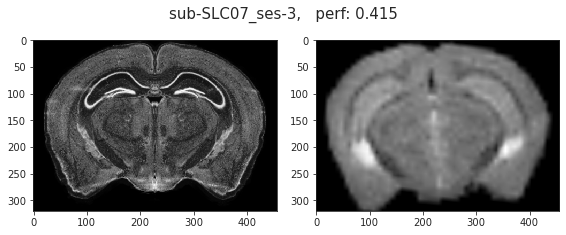

In [42]:
    fig, axes = create_figure(1, 2, (8, 3.1))

    axes[0].imshow(reg.nissl[300], cmap='Greys_r')
    axes[1].imshow(indiv_aff[300], cmap='Greys_r')

    # mi = ants.image_mutual_information(reg.nissl, indiv_aff)
    fig.suptitle(f"{key},   perf: {mi / base_mi:0.3f}", fontsize=15)
    plt.show()

In [9]:
key = 'sub-SLC07_ses-3'
indiv = reg._prepare(mice.T1w[key].get_data(), 200)
indiv

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (200.0, 200.0, 200.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [10]:
tx_aff = f"{key}_space-CCF-3d_ants-Aff-init.mat"
tx_aff = pjoin(mice.cfg.tx_dir, tx_aff)
tx_aff = ants.read_transform(tx_aff, 3)

In [11]:
tx_aff.parameters

array([ 7.61217237e-01, -2.25951836e-01,  3.17604810e-01,  3.80213410e-01,
        6.69637799e-01, -2.56995130e-02, -2.82953203e-01,  7.90555328e-02,
        7.77895510e-01, -2.63565674e+03, -1.94909814e+03, -2.54836377e+03])

In [12]:
indiv_aff = tx_aff.apply_to_image(indiv, reg.nissl, 'linear')

<matplotlib.image.AxesImage object at 0x7f68c47856a0>

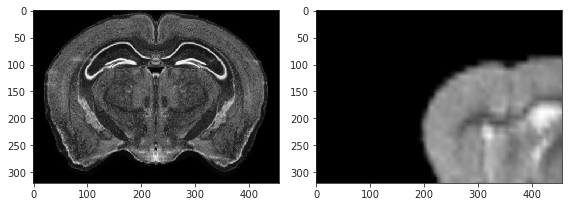

In [13]:
fig, axes = create_figure(1, 2, (8, 7))

axes[0].imshow(reg.nissl[300], cmap='Greys_r')
axes[1].imshow(indiv_aff[300], cmap='Greys_r')

In [14]:
base_mi = ants.image_mutual_information(reg.nissl, reg.nissl)

In [15]:
mi = ants.image_mutual_information(reg.nissl, indiv_aff)
mi / base_mi

0.013736391173934145

In [16]:
mice = Mice(Config(17, resolution=25), load_preproc=True)

In [17]:
from register.register import *
reg = Register(mice, in_house_res=100)

In [18]:
base_mi = ants.image_mutual_information(reg.nissl, reg.nissl)

 bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


CPU times: user 37min 49s, sys: 13.9 s, total: 38min 3s
Wall time: 2min 40s


0.41517654207466365

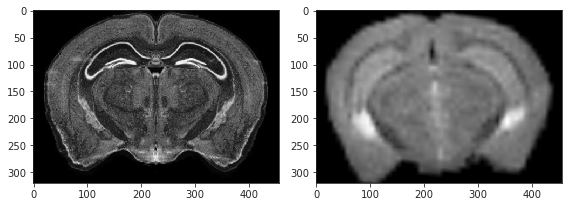

In [19]:
%%time

txfile = ants.affine_initializer(
    fixed_image=reg.nissl,
    moving_image=indiv,
    search_factor=20,
    radian_fraction=0.0001,
    use_principal_axis=False,
    local_search_iterations=10,
)
tx_aff = ants.read_transform(
    filename=txfile,
    dimension=3,
)

indiv_aff = tx_aff.apply_to_image(indiv, reg.nissl, 'linear')

fig, axes = create_figure(1, 2, (8, 7))
axes[0].imshow(reg.nissl[300], cmap='Greys_r')
axes[1].imshow(indiv_aff[300], cmap='Greys_r')

mi = ants.image_mutual_information(reg.nissl, indiv_aff)
mi / base_mi

In [20]:
txfile

'/tmp/tmpnbmis7il.mat'

In [21]:
tx_aff

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [22]:
tx_aff.parameters

array([ 9.52979982e-01, -2.47550324e-01, -2.41722520e-02,  2.11171031e-01,
        8.26168299e-01, -9.09454003e-02,  3.68244685e-02,  5.07388338e-02,
        9.30673540e-01,  6.68883057e+02, -1.92286346e+02,  5.21988770e+02])

In [25]:
ext = '.'.join(txfile.split('.')[1:])
dst = f"test.{ext}"
dst = pjoin(mice.cfg.tx_dir, dst)
shutil.copyfile(src=txfile, dst=dst)

'/home/hadi/Documents/Ca-fMRI/processed/transforms/test.mat'

In [26]:
txfile2 = '/home/hadi/Documents/Ca-fMRI/processed/transforms/test.mat'
tx_aff2 = ants.read_transform(txfile2, 3)

In [27]:
tx_aff2

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [28]:
tx_aff2.parameters

array([ 9.52979982e-01, -2.47550324e-01, -2.41722520e-02,  2.11171031e-01,
        8.26168299e-01, -9.09454003e-02,  3.68244685e-02,  5.07388338e-02,
        9.30673540e-01,  6.68883057e+02, -1.92286346e+02,  5.21988770e+02])

0.41517654207466365

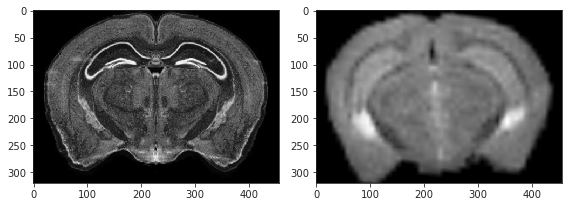

In [29]:
indiv_aff = tx_aff2.apply_to_image(indiv, reg.nissl, 'linear')

fig, axes = create_figure(1, 2, (8, 7))
axes[0].imshow(reg.nissl[300], cmap='Greys_r')
axes[1].imshow(indiv_aff[300], cmap='Greys_r')

mi = ants.image_mutual_information(reg.nissl, indiv_aff)
mi / base_mi

0.4170571606162416

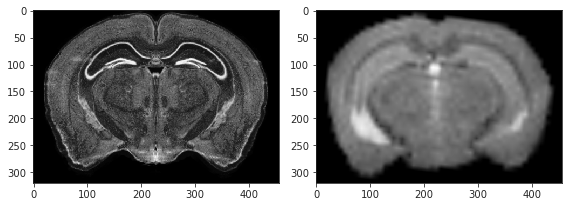

In [27]:
indiv_aff = tx_aff.apply_to_image(indiv, reg.nissl, 'linear')

fig, axes = create_figure(1, 2, (8, 7))
axes[0].imshow(reg.nissl[300], cmap='Greys_r')
axes[1].imshow(indiv_aff[300], cmap='Greys_r')

mi = ants.image_mutual_information(reg.nissl, indiv_aff)
mi / base_mi

## Establishement

In [2]:
mice = Mice(Config(17, resolution=25), load_preproc=True)

In [3]:
from register.register import *
reg = Register(mice, in_house_res=100)

In [4]:
reg.objects

{
    'misc': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'iso': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]
,
    'hemis': ANTsImage (RAI)
         Pixel Type : unsigned int (uint32)
         Components : 1
         Dimensions : (528, 320, 456)
         Spacing    : (25.0, 25.0, 25.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

}

<matplotlib.image.AxesImage object at 0x7ffb1066faf0>

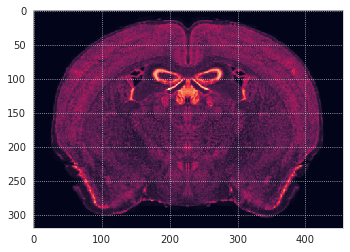

In [5]:
plt.imshow(reg.nissl.numpy()[250])

In [6]:
sys.getsizeof(reg.nissl.numpy()) / 1e9

0.308183176

## Affined

In [7]:
txfile = ants.affine_initializer(
    fixed_image=reg.nissl,
    moving_image=reg.in_house,
)
txfile

 bad det 

'/tmp/tmpe4rgq92k.mat'

-1 v 1 u -1
 bad det -1 v 1 u -1 new 1


In [8]:
tx_aff = ants.read_transform(txfile, dimension=3)
tx_aff

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [9]:
yale_affined = tx_aff.apply_to_image(reg.in_house, reg.nissl)

<matplotlib.image.AxesImage object at 0x7ffac9725a90>

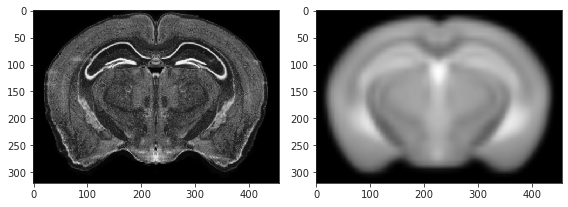

In [10]:
fig, axes = create_figure(1, 2, (8, 7))

axes[0].imshow(reg.nissl[300], cmap='Greys_r')
axes[1].imshow(yale_affined[300], cmap='Greys_r')

In [11]:
reg.mi_base = ants.image_mutual_information(reg.nissl, reg.nissl)

In [12]:
tx2 = ants.registration(
    fixed=reg.nissl,
    moving=yale_affined,
    type_of_transform='SyNAggro',
    aff_metric='GC',
    grad_step=0.2,
    syn_sampling=32,
    aff_sampling=20,
    aff_random_sampling_rate=0.2,
    random_seed=4,
    verbose=False,
)

In [13]:
scores = reg.tx_peformance(
    fixed=reg.nissl,
    tx=tx2,
    moving=yale_affined,
    tx_aff=tx_aff,
    moving_orig=reg.in_house,
)

In [14]:
scores

{
    'mi': 0.5045410467450004,
    'ovp_MOp': 1.0,
    'sym_MOp': 0.9929003418353931,
    'ovp_MOs': 1.0,
    'sym_MOs': 0.9892344497607656,
    'ovp_SS': 1.0,
    'sym_SS': 0.9672688422688422,
    'ovp_VISC': 1.0,
    'sym_VISC': 0.9758241758241758,
    'ovp_VIS': 1.0,
    'sym_VIS': 0.9704397981254507,
    'ovp_AI': 0.9996900666356733,
    'sym_AI': 0.9818796068796068,
    'ovp_PTLp': 1.0,
    'sym_PTLp': 0.9966887417218543,
    'ovp_TEa': 1.0,
    'sym_TEa': 0.9724137931034482,
    'ovp_CA1': 1.0,
    'sym_CA1': 0.998886104149262,
    'ovp_CLA': 1.0,
    'sym_CLA': 0.9514563106796117,
    'ovp_STRd': 1.0,
    'sym_STRd': 0.9982576500054449,
    'ovp_iso': 0.9999750040618399,
    'sym_iso': 0.9824826560951437,
    'sym': 0.9831409609006256,
    'ovp': 0.9999802351413913
}

In [16]:
reg.objects_in_house.update(reg.apply2objects(
    moving=yale_affined,
    moving_orig=reg.in_house,
    tx_aff=tx_aff,
    tx=tx2,
))

In [18]:
for k, v in reg.objects_in_house.items():
    ants.image_write(v, f"./Sep29/{k}_yale-{0.1}_25_aff_gc_best.nii.gz")

In [20]:
for k, v in reg.objects_in_house.items():
    lps = reorient_arr(v.numpy(), reg.tr_axes)
    lps = lps[..., ::-1]
    lps = reset_ants_img(lps, spacing=0.1, dtype='uint32')
    ants.image_write(lps, f"./Sep29/{k}_yale-{0.1}_25_aff_gc_best_lps.nii.gz")

In [21]:
dst = 'Sep29/yale100_2_nissl25'
for src in tx2['fwdtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-fwd.{ext}")
    shutil.copyfile(src=src, dst=_dst)
for src in tx2['invtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-inv.{ext}")
    shutil.copyfile(src=src, dst=_dst)
    
dst = 'Sep29/yale100_2_nissl25'
ext = '.'.join(txfile.split('.')[1:])
dst = pjoin('.', f"{dst}-aff.{ext}")
shutil.copyfile(src=txfile, dst=dst)

'./Sep29/yale100_2_nissl25-aff.mat'

## Now do indiv

In [22]:
key = 'sub-SLC01_ses-1'
indiv = reg._prepare(mice.T1w[key].get_data(), 200)
ants.image_write(indiv, f"./Sep29/{key}.nii.gz")
indiv

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (200.0, 200.0, 200.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [23]:
txfile = ants.affine_initializer(
    fixed_image=reg.in_house,
    moving_image=indiv,
)
txfile

'/tmp/tmp46w5d512.mat'

In [24]:
tx_aff = ants.read_transform(txfile, dimension=3)
tx_aff

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [25]:
indiv_affined = tx_aff.apply_to_image(indiv, reg.in_house, 'linear')

<matplotlib.image.AxesImage object at 0x7ffac956ecd0>

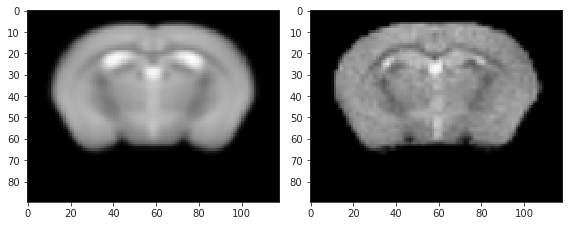

In [26]:
fig, axes = create_figure(1, 2, (8, 7))

axes[0].imshow(reg.in_house[70], cmap='Greys_r')
axes[1].imshow(indiv_affined[70], cmap='Greys_r')

In [27]:
reg.mi_base = ants.image_mutual_information(reg.in_house, reg.in_house)

In [28]:
tx2 = ants.registration(
    fixed=reg.in_house,
    moving=indiv_affined,
    type_of_transform='ElasticSyN',# 'SyNAggro',
    aff_metric='GC',
    grad_step=0.2,
    syn_sampling=32,
    aff_sampling=16,
    aff_random_sampling_rate=0.2,
    random_seed=4,
    verbose=False,
)

In [29]:
reg.objects = reg.objects_in_house

In [30]:
scores = reg.tx_peformance(
    fixed=reg.in_house,
    tx=tx2,
    moving=indiv_affined,
    tx_aff=tx_aff,
    moving_orig=indiv,
)
scores['mi']

0.8084222014735437

In [31]:
scores

{
    'mi': 0.8084222014735437,
    'ovp_MOp': 0.9931840311587147,
    'sym_MOp': 0.9599236641221374,
    'ovp_MOs': 0.9953314659197012,
    'sym_MOs': 0.9907063197026023,
    'ovp_SS': 0.9996719160104987,
    'sym_SS': 0.9002493765586035,
    'ovp_VISC': 1.0,
    'sym_VISC': 0.984,
    'ovp_VIS': 0.9991087344028521,
    'sym_VIS': 0.9547038327526133,
    'ovp_AI': 0.9800703399765534,
    'sym_AI': 0.8747252747252747,
    'ovp_PTLp': 1.0,
    'sym_PTLp': 0.9594594594594594,
    'ovp_TEa': 1.0,
    'sym_TEa': 0.8648648648648649,
    'ovp_CA1': 1.0,
    'sym_CA1': 0.9272300469483568,
    'ovp_CLA': 1.0,
    'sym_CLA': 0.736842105263158,
    'ovp_STRd': 1.0,
    'sym_STRd': 0.96,
    'ovp_iso': 0.9959835850868768,
    'sym_iso': 0.9897498262682418,
    'sym': 0.9355104952452368,
    'ovp': 0.9974250204772248
}

In [32]:
dst = f'Sep29/{key}_2_yale100'
for src in tx2['fwdtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-fwd.{ext}")
    shutil.copyfile(src=src, dst=_dst)
for src in tx2['invtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-inv.{ext}")
    shutil.copyfile(src=src, dst=_dst)
    
dst = f'Sep29/{key}_2_yale100'
ext = '.'.join(txfile.split('.')[1:])
dst = pjoin('.', f"{dst}-aff.{ext}")
shutil.copyfile(src=txfile, dst=dst)

'./Sep29/sub-SLC01_ses-1_2_yale100-aff.mat'

In [33]:
obj = reg.apply2objects(
    moving=indiv_affined,
    moving_orig=indiv,
    tx_aff=tx_aff,
    tx=tx2,
)

In [34]:
for k, v in obj.items():
    ants.image_write(v, f"./Sep29/{k}_{key}_25_aff_gc_best.nii.gz")

## Now Direct

In [35]:
reg = Register(mice)

In [36]:
key = 'sub-SLC01_ses-1'
indiv = reg._prepare(mice.T1w[key].get_data(), 200)
ants.image_write(indiv, f"./Sep29/{key}.nii.gz")
indiv

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (200.0, 200.0, 200.0)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [37]:
txfile = ants.affine_initializer(
    fixed_image=reg.nissl,
    moving_image=indiv,
)
txfile

 bad det -1 v 1 u -1
 bad det -1 v 1 u -1 new 1


'/tmp/tmpj06j3f3x.mat'

In [38]:
tx_aff = ants.read_transform(txfile, dimension=3)
tx_aff

ANTsTransform
         Type       : AffineTransform
         Dimension  : 3
         Precision  : float

In [39]:
indiv_affined = tx_aff.apply_to_image(indiv, reg.nissl, 'linear')

<matplotlib.image.AxesImage object at 0x7f1c89df40a0>

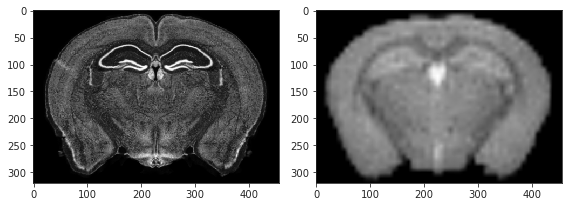

In [40]:
fig, axes = create_figure(1, 2, (8, 7))

axes[0].imshow(reg.nissl[280], cmap='Greys_r')
axes[1].imshow(indiv_affined[280], cmap='Greys_r')

In [41]:
reg.mi_base = ants.image_mutual_information(reg.nissl, reg.nissl)

In [48]:
tx2 = ants.registration(
    fixed=reg.nissl,
    moving=indiv_affined,
    type_of_transform='ElasticSyN',
    aff_metric='GC',
    grad_step=0.2,
    syn_sampling=32,
    aff_sampling=16,
    aff_random_sampling_rate=0.2,
    random_seed=4,
    verbose=False,
)

In [49]:
scores = reg.tx_peformance(
    fixed=reg.nissl,
    tx=tx2,
    moving=indiv_affined,
    tx_aff=tx_aff,
    moving_orig=indiv,
)

In [50]:
scores

{
    'mi': 0.4778731666809255,
    'ovp_MOp': 0.9989550679205852,
    'sym_MOp': 0.9854771784232366,
    'ovp_MOs': 0.9972118959107806,
    'sym_MOs': 0.9925925925925926,
    'ovp_SS': 0.9988810145468109,
    'sym_SS': 0.9455732946298984,
    'ovp_VISC': 1.0,
    'sym_VISC': 0.9565217391304348,
    'ovp_VIS': 1.0,
    'sym_VIS': 0.9646017699115044,
    'ovp_AI': 0.9845505617977528,
    'sym_AI': 0.9560439560439561,
    'ovp_PTLp': 1.0,
    'sym_PTLp': 0.9761904761904762,
    'ovp_TEa': 1.0,
    'sym_TEa': 0.9738562091503268,
    'ovp_CA1': 1.0,
    'sym_CA1': 1.0,
    'ovp_CLA': 1.0,
    'sym_CLA': 0.9375,
    'ovp_STRd': 1.0,
    'sym_STRd': 0.9925742574257426,
    'ovp_iso': 0.9980910566001718,
    'sym_iso': 0.9922038410344172,
    'sym': 0.9727930001168793,
    'ovp': 0.998322763871698
}

{
    'mi': 0.4778731666809255,
    'ovp_MOp': 0.9989550679205852,
    'sym_MOp': 0.9854771784232366,
    'ovp_MOs': 0.9972118959107806,
    'sym_MOs': 0.9925925925925926,
    'ovp_SS': 0.9988810145468109,
    'sym_SS': 0.9455732946298984,
    'ovp_VISC': 1.0,
    'sym_VISC': 0.9565217391304348,
    'ovp_VIS': 1.0,
    'sym_VIS': 0.9646017699115044,
    'ovp_AI': 0.9845505617977528,
    'sym_AI': 0.9560439560439561,
    'ovp_PTLp': 1.0,
    'sym_PTLp': 0.9761904761904762,
    'ovp_TEa': 1.0,
    'sym_TEa': 0.9738562091503268,
    'ovp_CA1': 1.0,
    'sym_CA1': 1.0,
    'ovp_CLA': 1.0,
    'sym_CLA': 0.9375,
    'ovp_STRd': 1.0,
    'sym_STRd': 0.9925742574257426,
    'ovp_iso': 0.9980910566001718,
    'sym_iso': 0.9922038410344172,
    'sym': 0.9727930001168793,
    'ovp': 0.998322763871698
}

In [51]:
dst = f'Sep29/{key}_2_nissl'
for src in tx2['fwdtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-fwd.{ext}")
    shutil.copyfile(src=src, dst=_dst)
for src in tx2['invtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-inv.{ext}")
    shutil.copyfile(src=src, dst=_dst)

dst = f'Sep29/{key}_2_nissl'
ext = '.'.join(txfile.split('.')[1:])
dst = pjoin('.', f"{dst}-aff.{ext}")
shutil.copyfile(src=txfile, dst=dst)

'./Sep29/sub-SLC01_ses-1_2_nissl-aff.mat'

In [52]:
obj = reg.apply2objects(
    moving=indiv_affined,
    moving_orig=indiv,
    tx_aff=tx_aff,
    tx=tx2,
)

In [53]:
for k, v in obj.items():
    ants.image_write(v, f"./Sep29/{k}_{key}_25_aff_gc_direct_best.nii.gz")